In [ ]:
 import requests
from bs4 import BeautifulSoup
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from transformers import T5Tokenizer, pipeline

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Device set to use cpu


Scraping documents...
Scraping document 1: https://en.wikipedia.org/wiki/Artificial_intelligence
Scraping document 2: https://en.wikipedia.org/wiki/Machine_learning
Scraping document 3: https://en.wikipedia.org/wiki/Deep_learning
Preprocessing text...
Visualizing text...


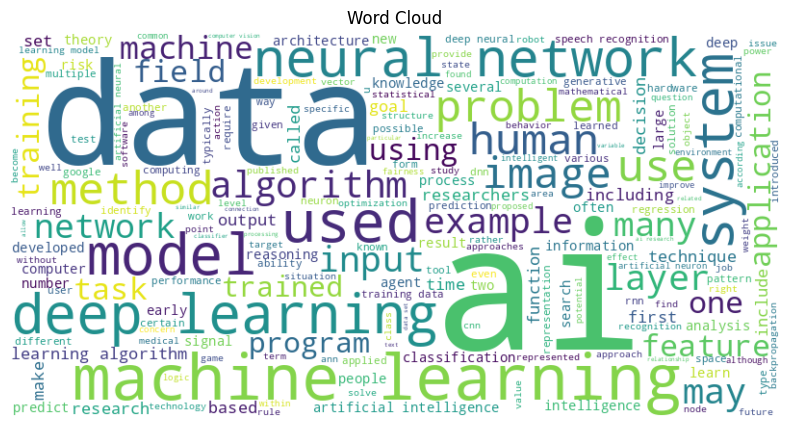

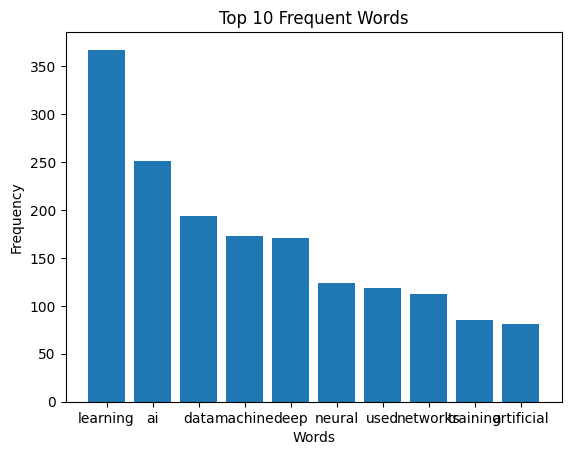

Generating summary...

=== Summary ===
artificial intelligence ai broadest sense intelligence exhibited machines particularly computer systems field research computer science develops studies methods software enable machines perceive environment use learning intelligence take actions maximize chances achieving defined goals 1 machines may called ais applications . include advanced web search engines google search recommendation systems used youtube amazon netflix virtual assistants google assistant siri alexa autonomous vehicles waymo generative creative tools chatgpt . interpretation 19 clinical decision support 20 knowledge discovery mining interesting actionable inferences large databases 21 areas 22 knowledge base body knowledge represented form used program ontology set objects relations concepts properties used particular domain knowledge 23 knowledge bases need represent things objects properties categories relations objects 24 situations events states time 25 causes effects 26 

In [ ]:
# Step 1: Predefined Document Sources (Static URLs or Local Files)
DOCUMENTS = [
    "https://en.wikipedia.org/wiki/Artificial_intelligence",
    "https://en.wikipedia.org/wiki/Machine_learning",
    "https://en.wikipedia.org/wiki/Deep_learning"
]

# Step 2: Web Scraping
def scrape_webpage(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        paragraphs = soup.find_all('p')
        text = " ".join([p.get_text() for p in paragraphs])
        return text
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return ""

# Step 3: Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(cleaned_tokens)



# Step 4: Generate Word Cloud and Frequency Plot
def visualize_text(text):
    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()

    # Frequency Plot
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.toarray()[0]))
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    words, frequencies = zip(*sorted_words)
    plt.bar(words, frequencies)
    plt.title("Top 10 Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()



# Initialize the tokenizer and summarizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")
summarizer = pipeline("summarization", model="t5-small")

# Function to split text into smaller chunks while respecting the token limit
def chunk_text(text, max_tokens=512):
    # Tokenize the text
    tokens = tokenizer.encode(text, truncation=False, max_length=max_tokens)

    # Split the tokens into chunks of max_tokens size
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        if len(chunk) <= max_tokens:
            chunks.append(chunk)

    return chunks

# Function to summarize each chunk and combine the results
def summarize_chunks(chunks):
    summaries = []
    for chunk in chunks:
        # Decode the chunk into text
        chunk_text = tokenizer.decode(chunk, skip_special_tokens=True)

        # Summarize the chunk
        try:
            summary = summarizer(chunk_text, max_length=100, min_length=50, do_sample=False)
            summaries.append(summary[0]['summary_text'])
        except Exception as e:
            print(f"Error summarizing chunk: {e}")
            summaries.append("Summary Error")

    return " ".join(summaries)

# Main Script
if __name__ == "__main__":
    # Scrape documents
    print("Scraping documents...")
    all_text = ""
    for i, url in enumerate(DOCUMENTS):
        print(f"Scraping document {i + 1}: {url}")
        text = scrape_webpage(url)
        all_text += f" {text}"

    print("Preprocessing text...")
    cleaned_text = preprocess_text(all_text)

    print("Visualizing text...")
    visualize_text(cleaned_text)

    print("Generating summary...")
    # Chunk text and summarize
    chunks = chunk_text(cleaned_text, max_tokens=500)
    summary = summarize_chunks(chunks)

    print("\n=== Summary ===")
    print(summary)






artificial intelligence ai broadest sense intelligence exhibited machines particularly computer systems field research computer science develops studies methods software enable machines perceive environment use learning intelligence take actions maximize chances achieving defined goals 1 machines may called ais applications . include advanced web search engines google search recommendation systems used youtube amazon netflix virtual assistants google assistant siri alexa autonomous vehicles waymo generative creative tools chatgpt . interpretation 19 clinical decision support 20 knowledge discovery mining interesting actionable inferences large databases 21 areas 22 knowledge base body knowledge represented form used program ontology set objects relations concepts properties used particular domain knowledge 23 knowledge bases need represent things objects properties categories relations objects 24 situations events states time 25 causes effects 26 knowledge knowledge know people know 27 default reasoning things humans assume true told differently remain true even facts . speech recognition speech synthesis machine translation information retrieval question answering 51 early work based noam chomsky generative grammar semantic networks difficulty disambiguation f unless restricted small domains called due common sense knowledge problem 29 margaret masterman believed meaning grammar key understanding languages nlp include word embedding representing words typically vectors encoding meaning 52 transformers deep learning architecture . 78 formal logic comes two main forms propositional logic operates statements true false uses logical connectives implies 79 predicate logic also operates objects predicates relations uses quantifiers every x xs ys 80 deductive reasoning logic process proving new statement conclusion statements given assumed true premises 81 proofs structured proof trees nodes labelled sentences children nodes connected parent nodes inference rules given problem set premises reduces searching proof tree whose root node class labels known data set new observation received observation classified based previous experience 45 many kinds classifiers use 99 decision tree simplest widely used symbolic machine learning algorithm 100 neighbor algorithm widely used analogical ai kernel methods support vector machine svm displaced neighbor 1990s 101 naive bayes classifier reportedly widely used . 104 artificial neural network based collection nodes also known artificial neurons loosely model neurons biological brain trained recognise patterns . gpt models process different types data modalities images videos sound text 125 late 2010s graphics processing units gpus increasingly designed enhancements specialized tensorflow software replaced previously used central processing unit cpus dominant means commercial academic machine learning models training 126 specialized programming languages prolog used early ai research 127 programming languages like python become predominant 128 transistor density integrated circuits observed roughly double every 18 trend known moore 143 144 game playing programs used since 1950s demonstrate test ai advanced techniques 145 deep blue became first computer system beat reigning world chess champion garry kasparov 11 may 1997 146 2011 jeopardy quiz show exhibition match ibm question answering system watson defeated brad rutter ken jennings significant margin 147 march 2016 alphago 4 5 games go match go champion lee sedol becoming genai ai capable generating text images videos data using generative models 168 169 often response prompts 170 171 march 2023 58 adults heard chatgpt 14 tried 172 increasing realism generators midjourney stable diffusion sparked trend viral photos widespread attention gained fake photo pope francis wearing white puffer coat fictional arrest donald trump hoax attack pentagon well usage professional creative arts 173 gps videos social media ai provide real time information real time evacuation conditions 179 180 181 agriculture a I helped farmers identify areas need irrigation fertilization pesticide treatments increasing yield agronomists use aI conduct research development . agriculture robots conduct predictive analytics classify livestock pig call emotions automate greenhouse detect diseases pests save water artificial intelligence used astronomy analyze increasing amounts available data applications mainly classification regression clustering forecasting generation discovery author john grisham jonathan franzen sued ai companies using work train generative . 192 193 website owners wish content scraped indicate file 194 2023 leading authors including . grisham and franze . another discussed approach envision separate sui generis system protection creations . created . human authors 197 commercial . scene dominated big tech companies alphabet amazon . us nuclear regulatory commission approved first ever us nuclear plant 835 megawatts power enough homes energy produced cost upgrading estimated billion us dependent tax breaks nuclear power contained 2022 us inflation reduction act 210 us government state michigan investing almost 2 billion us reopen palisades nuclear reactor lake michigan closed since 2022 plant planned reopened october 3 mile island facility . bias introduced way training data selected way model deployed 222 220 biased algorithm used make decisions seriously harm people medicine finance recruitment housing policing algorithm may cause discrimination 223 field fairness studies prevent harms algorithmic biases june 28 2015 google photos new image labeling feature mistakenly identified jacky alcine friend gorillas black system trained dataset contained images black people 224 problem called sample size disparity 225 google fixed problem preventing system labelling biases may conflict laws 219 2022 conference fairness accountability transparency acm facct 2022 association computing machinery seoul south korea presented published findings recommend robotics systems demonstrated free bias mistakes unsafe use neural networks trained vast unregulated sources flawed internet data curtailed dubious discuss 234 many ai systems complex designers explain reach decisions 235 particularly deep neural networks large amount relationships inputs outputs . popular explainability techniques exist 236 impossible control citizens several ways face voice recognition allow widespread surveillance machine learning operating data classify potential enemies state prevent hiding recommendation systems precisely target propaganda misinformation maximum effect deepfakes generative ai aid producing misinformation . the centralized decision making competitive liberal decentralized systems markets lowers cost difficulty digital warfare advanced spyware 251 technologies available since 2020 facial recognition systems already used mass surveillance china 252 253 many ways ais expected help bad actors foreseen example a yuval noah harari argues ai require robot body physical control pose existential risk essential parts civilization physical things like ideologies law . 270 opinions amongst experts industry insiders mixed sizable fractions concerned unconcerned risk eventual superintelligent ais 271 personalities stephen hawking bill gates elon musk . aaai symposium 2005 286 approaches include wendell wallach artificial moral agents 287 stuart russell three principles developing provably beneficial machines 288 active organizations ai community include hugging face 289 google 290 eleutherai meta 291 . llama 2 mistral stable diffusion made 292 293 meaning architecture trained parameters weights publicly available models freely allows companies specialize data 294 models useful research innovation also misused since security huttenlocher published joint statement november 2021 calling government commission regulate ai 307 2023 openai leaders published recommendations governance superintelligence believe may happen less 10 years 308 2023 united nations also launched advisory body provide recommendations . europe created first international legally binding treaty . called framework convention artificial intelligence human rights democracy rule law adopted eu . united states united kingdom signatories 310 2022 ipsos survey attitudes towards  marvin minsky agreed writing within generation problem creating intelligence substantially solved 329 however underestimated difficulty problem w 1974 british governments cut exploratory research response criticism sir james lighthill 331 ongoing pressure congress fund productive projects 332 minsky papert book perceptrons understood proving artificial neural networks would never useful solving tasks thus discrediting approach altogether 333 ai winter period obtaining funding . many researchers careers issues alignment problem became serious field academic study 283 late teens early 2020s agi companies began deliver programs created enormous interest 2015 alphago developed deepmind beat world champion go player program taught game rules developed strategy large language model released 2020 openai capable generating text 350 chatgpt launched november 30 2022 became consumer software application history gaining 100 million users two months 351 marked widely regarded ai breakout year . ai 367 many companies early 2020s aa unprecedented success statistical machine learning 2010s eclipsed approaches much sources especially business world use term artificial intelligence mean machine learning neural networks approach mostly soft narrow critics argue questions may revisited future generations . ais 370 simulated conscious reasoning people use solve puzzles express legal reasoning mathematics highly successful intelligent tasks algebra iq tests 1960s newell simon proposed physical symbol systems hypothesis physical symbol system necessary sufficient means general intelligent question become central philosophy mind also typically central question issue artificial intelligence fiction david chalmers identified two problems understanding mind named hard easy problems consciousness 381 easy problem understanding brain processes signals makes plans controls behavior hard problem explaining feels like something dennett consciousness illusionism says illusion human information processing easy explain human subjective experience difficult explain example easy imagine person learned identify objects field view red clear would required person know red looks like 382 computationalism position philosophy mind human mind information processing system thinking form computing computationalism kevin warwick inventor ray kurzweil predicted humans machines may merge future cyborgs capable powerful either idea called transhumanism roots writings aldous huxley robert ettinger 397 edward fredkin argues artificial intelligence next step evolution idea first proposed samuel butler darwin among machines far back 1863 . 401 isaac asimov introduced three laws robotic earliest machine learning model introduced 1950s arthur samuel invented program calculated winning chance checkers side history machine learning roots back decades human desire effort study human cognitive processes 12 1949 canadian psychologist donald hebb published book organization behavior . john hopfield david rumelhart geoffrey hinton main success came reinvention backpropagation 23 25 machine learning ml reorganized recognized field started flourish 1990s field changed goal achieving artificial intelligence tackling solvable problems practical nature shifted focus away symbolic approaches inherited ai toward methods models borrowed statistics fuzzy logic probability theory 24 close connection machine learning compression system predicts posterior probabilities sequence given entire history . focuses prediction based known properties learned training data mining focuses discovery previously unknown properties data analysis step knowledge discovery databases data mining uses many machine learning methods different goals hand machine learning also employs data mining methods unsupervised learning preprocessing step improve learner accuracy much confusion two research communities often separate conferences separate journals ecml pkdd major exception comes basic assumptions work machine learning performance usually evaluated respect ability reproduce known knowledge uninformed unsupervised method easily outperformed  data hypothesis less complex function model fitted data complexity model increased response training error decreases hypothesis complex model subject overfitting generalization poorer 43 addition performance bounds learning theorists study time complexity feasibility learning computational learning theory computation considered feasible done polynomial time two kinds time complexity results positive results show certain classes learned polynomyal time machine learning approaches traditionally divided three broad categories correspond learning paradigms depending nature signal feedback available learning system . many researchers found unlabeled data training sets 54 reinforcement learning area machine learning concerned software agents ought take actions environment maximize notion cumulative reward due generality field studied many disciplines game theory control theory operations research information theory optimization systems swarm intelligence statistics genetic algorithms reinforcement learning environment typically represented markov decision process mdp . coding algorithms aim learn representations directly tensor representations multidimensional data without reshaping vectors 66 deep learning algorithms discover multiple levels representation hierarchy features abstract features defined terms generating features argued intelligent machine one learns representation disentangles underlying factors variation explain observed data 67 feature learning motivated fact machine learning tasks classification often require input mathematically computationally convenient process . use set relational rules collectively represent knowledge captured system contrast machine learning algorithms commonly identify singular model universally applied instance order make prediction 77 machine learning approaches include learning classifier systems association rule learning artificial immune systems based concept strong rules rakesh agrawal tomasz imieliski arun swami introduced association rules discovering regularities products transaction data recorded pos systems supermarkets 78 example rule n p e b  artificial neural networks used variety tasks including computer vision speech recognition machine translation social network filtering playing board video games medical diagnosis deep learning consists multiple hidden layers artificial neural network approach tries model way human brain processes light sound vision hearing successful applications . based collection connected units nodes called artificial neurons loosely model neurons biological brain connection like synapses biological brain transmit information signal one artificial neuron another artificial neural receives signal process signal additional artificial neurons connected common ann implementations signal connection variables fitting multidimensional linear model particularly useful scenarios outputs interdependent share patterns predicting multiple economic indicators reconstructing images 89 inherently bayesian network belief network directed acyclic graphical model probabilistic graphical modeling represents set random variables conditional independence directed . graph dag example bayessian network could represent probabilistic relationships diseases symptoms given symptoms network used compute probabilities presence various diseases efficient algorithms exist perform inference learning bayeses model sequences variables like speech signals machine learning adapted form distributed artificial intelligence training machine learning models decentralizes training process allowing users privacy maintained needing send data centralized server also increases efficiency decentralizing training process many devices example gboard uses federated machine learning train search query prediction models users mobile phones without send individual searches back google 94 many applications machine learning including 2006 provider netflix held first net-flix prize competition find program better predict user preferences improve accuracy existing cinematch movie recommendation algorithm  119 2018 car uber failed detect pedestrian killed collision 120 attempts use machine learning healthcare ibm watson system failed deliver even years time billions dollars invested 121 122 microsoft bing chat chatbot reported produce hostile offensive response users 123 machine learning used strategy update evidence related systematic review increased reviewer burden related growth biomedical literature improved training sets yet developed sufficiently reduce workload burden without limiting necessary sensitivity findings research 124 explainable ai x numerators denominators receiver operating characteristic roc along accompany area roc curve auc offer additional tools classification model assessment higher auc associated better performing model 137 ethics artificial intelligence covers broad range topics within field considered particular ethical stakes 138 includes algorithmic biases fairness automated accountability privacy regulation also covers various emerging potential future challenges machine ethics make machines behave ethically lethal autonomous weapon systems arms race dynamics ai welfare rights artificial superintelligence existential risks 138 different gorilla label subsequently removed 2023 still recognize gorillas 151 similar issues recognizing people found many systems 152 challenges effective use machine learning may take longer adopted domains 153 concern fairness machine learning reducing bias machine learning propelling use human good increasingly expressed artificial intelligence scientists including li said nothing artificial ai inspired people created people impacts people powerful tool beginning understand profound responsibility 154 concerns among health care professionals systems might designed public interest machines especially true united states ethical dilemma deep belief networks recurrent neural networks convolutional neural networks generative adversarial networks transformers neural radiance fields architectures applied fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection board game programs produced results comparable cases surpassing human expert performance 3 4 5 early forms neural networks inspired information processing distributed communication nodes . imation theorem concerns capacity feedforward neural networks single hidden layer finite size approximate continuous functions 17 18 19 20 1989 first proof published george cybenko sigmoid activation functions 17 generalised architectures 1991 kurt hornik 18 recent work also showed universal approximation also holds active functions . kunihiko fukushima rectified linear unit 25 26 universal adms deep neural networks deep network eight layers trained method 41 based layer layer training regression analysis superfluous hidden units pruned using separate validation set since activation functions nodes polynomials also first deep networks multiplicative units gates 31 first deep learning multilayer perceptron trained stochastic gradient descent 42 published 1967 amari 43 computer experiments conducted amari student saito five layer mlp two modifiable layers learned internal representations classify separable pattern classes 31 cnn yann lecun et classifies digits applied several banks recognize numbers checks digitized 32x32 pixel images 64 recurrent neural networks rnn 28 30 developed 1980s recurrence used sequence processing . network unrolled mathematically resembles deep feedforward layer consequently similar properties issues developments mutual influences . two early influential works jordan network 1986 65 elman network 1990 66 mann machine 78 helmholtz machine 79 algorithm 80 designed unsupervised learning deep generative models however computationally expensive compared backpropagation boltzmann machine learning algorithm . 83 84 85 methods never outperformed gaussian mixture markov model technology based speech trained discriminatively 86 key difficulties analyzed including gradient diminishing 70 weak temporal correlation structure neural predictive models 87 88 additional difficulties lack training data . deep learning speech recognition started around 2009 nips workshop deep generative models speech recognition motivated limitations deep neural nets might become practical believed dnns using generative model deep belief nets dbn would overcome main difficulties neural net . however discovered replacing large amounts training data straightforward backpropagation using large output layers produced error rates dramatically lower gaussian mixture model gmm markov model hmm also generative systems 105 . eled images taken youtube videos 120 october 2012 alexnet alex krizhevsky ilya sutskever geoffrey hinton 4 imagenet competition significant margin shallow machine learning methods incremental improvements included network karen simonyan andrew zisserman 121 google inceptionv3 122 success image classification extended challenging task generating descriptions captions images often combination cnns lstms networks critical component computing 145 artificial neural networks constitute animal brains systems learn progressively improve ability tasks considering examples generally without programming example image recognition might learn identify images contain cats analyzing example images manually labeled cat cat using analytic results identify cats images found use applications difficult express traditional computer algorithm using programming ann based collection connected units called artificial neurons analogous biological neurons biological brain connection synapse neurons transmit signal another neuron receiving postsynaptic neuron process values weights connections weights inputs multiplied return output 0 network accurately recognize particular pattern algorithm would adjust weights 152 way algorithm make certain parameters influential determines correct mathematical manipulation fully process data recurrent neural networks data flow direction used applications language modeling 160 cnns also applied acoustic modeling automatic speech recognition asr 161 anns many issues arise naively trained dns two common issues overfitting computation time d processors include neural processing units npus huawei cellphones 175 cloud computing servers tpu google cloud platform 176 cerebras systems also built dedicated system handle large deep learning models based largest processor industry wafer scale engine 177 178 atomically thin semiconductors considered promising deep learning hardware . marega et al published experiments active channel material developing devices circuits based transistors fgfets 179 20 fdna used analyze cases human malformation connected large database genetic syndromes closely related progress made image recognition increasing application deep learning techniques 153 lstm helped improve machine translation language modeling 154 155 156 key techniques field negative sampling 194 word embedding word2vec thought representational layer deep learning architecture transform atomic word positional representation word relative words dataset position represented point vector space . rfm variables estimated value function shown natural interpretation customer lifetime value 223 recommendation systems used deep learning extract meaningful features latent factor model music journal recommendations 224 225 deep learning applied learning user preferences multiple domains 226 model uses hybrid collaborative approach enhances recommendations multiple tasks autoencoder ann used bioinformatics predict gene ontology annotations relationships 227 medical informatics deep learning used predict sleep quality based data wearables 228 predictions health complications ai deep learning suggests possibility minimizing eliminating manual lab experiments allowing scientists focus design analysis unique compounds 242 243 244 united states department defense applied deep learning train robots new tasks observation 245 physics informed neural networks used solve partial differential equations forward inverse problems data driven manner 246 one example reconstructing fluid flow governed equations . neocortical development proposed cognitive neuroscientists early 1990s 255 256 257 258 developmental theories instantiated computational models making predecessors deep learning systems development models share property various proposed learning dynamics brain wave nerve growth factor support somewhat analogous neural networks employ hierarchy layered filters layer considers information prior layer operating environment passes output possibly original input layers process yields stack transducers operating environment 1995 description stated infant brain seems organize influence waves different regions brain become connected gence less clear citation needed converge fast approximating deep learning methods often looked black box confirmations done empirically rather theoretically 278 others point deep learning looked step towards realizing strong ai disambiguation needed solution despite power deep learning method still lack much functionality needed realize goal entirely research psychologist gary marcus noted realistically deep learning part larger challenge building intelligent machines techniques lack ways representing causal relationships . anns trained defeat software repeatedly attacking defense malware continually altered genetic algorithm tricked retaining ability damage target 290 2016 another group demonstrated certain sounds could make google voice command system open particular web address hypothesized could serve stepping stone attacks opening web page hosting malware 290 data poisoning false data continually smuggled machine learning system training set prevent achieving mastery .